In [29]:
# code from https://stackoverflow.com/questions/66896138/python-numpy-insert-2d-array-into-bigger-2d-array-on-given-posiiton user: Elmahy
import numpy as np

big = np.zeros((4, 4))

to_insert_arr = np.array([
    [1, 2],
    [3, 4]
])

def insert_at(big_arr, pos, to_insert_arr):
    x1 = pos[0]
    y1 = pos[1]
    x2 = x1 + to_insert_arr.shape[0]
    y2 = y1 + to_insert_arr.shape[1]

    assert x2  <= big.shape[0], "the position will make the small matrix exceed the boundaries at x"
    assert y2  <= big.shape[1], "the position will make the small matrix exceed the boundaries at y"

    big[x1:x2,y1:y2] = to_insert_arr

    return big
    


result = insert_at(big, (0, 0), to_insert_arr)
result

array([[1., 2., 0., 0.],
       [3., 4., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [30]:
import numpy as np

In [31]:
def move_tetromino(board, pos, tetromino):
    """Inserts tetromino in copy of board at pos"""
    x1 = pos[0]
    y1 = pos[1]
    x2 = x1 + tetromino.shape[0]
    y2 = y1 + tetromino.shape[1]

    assert x2  <= board.shape[0], "the position will make the small matrix exceed the boundaries at x"
    assert y2  <= board.shape[1], "the position will make the small matrix exceed the boundaries at y"

    new_board = np.array(board) # needs to be array() to point to different location
    new_board[x1:x2,y1:y2] = tetromino

    return new_board # returns new board, TODO: update board = new board when tetromino is locked in place

In [32]:
board = np.zeros((20, 10))                      # board (10x20 ((20x10)))
square = np.ones((2, 2))                        # Square-shape
line = np.ones((4, 1))                          # Line-shape
T, T[1, 0], T[1, 2] = np.ones((2, 3)), 0, 0     # T-shape
L1, L1[0:2, 1] = np.ones((3, 2)), 0             # L-shape one
L2, L2[0:2, 0] = np.ones((3, 2)), 0             # L-shape two
Z1, Z1[0, 0], Z1[1, 2] = np.ones((2, 3)), 0, 0  # Z-shape one
Z2, Z2[1, 0], Z2[0, 2] = np.ones((2, 3)), 0, 0  # Z-shape two

position = (0, 4)

In [33]:
board = np.zeros((5, 10))

temp_board = move_tetromino(board, position, square)
print(temp_board, "\n")

temp_board = move_tetromino(board, position, line)
print(temp_board)

[[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


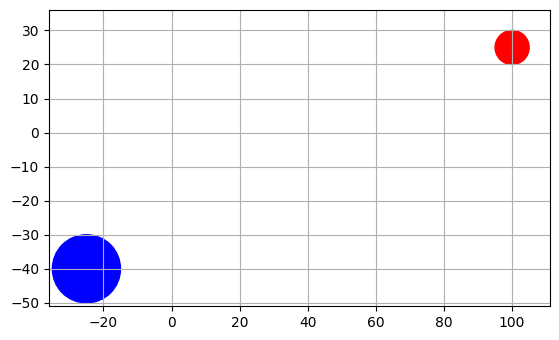

In [34]:
import matplotlib.pyplot as plt

# circle 1
x1 = 100
y1 = 25
r1 = 5

# circle 2
x2 = -25
y2 = -40
r2 = 10

xmin = min(x1, x2) - max(r1, r2) - 1
xmax = max(x1, x2) + max(r1, r2) + 1

ymin = min(y1, y2) - max(r1, r2) - 1
ymax = max(y1, y2) + max(r1, r2) + 1 

circle1 = plt.Circle((x1, y1), r1, color='r')
circle2 = plt.Circle((x2, y2), r2, color='b')

fig, ax = plt.subplots()
ax.set_aspect(1)

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.grid(visible = True, which = 'major') # NOTE way to plot lines exactly on center point of shapes?

ax.add_patch(circle1)
ax.add_patch(circle2);

In [35]:
class Circle:
    def __init__(self, r, x, y) -> None:
        self.r = r
        self.x = x
        self.y = y

class Rectangle:
    def __init__(self, w, h, x, y) -> None:
        self.w = w
        self.h = h
        self.x = x
        self.y = y

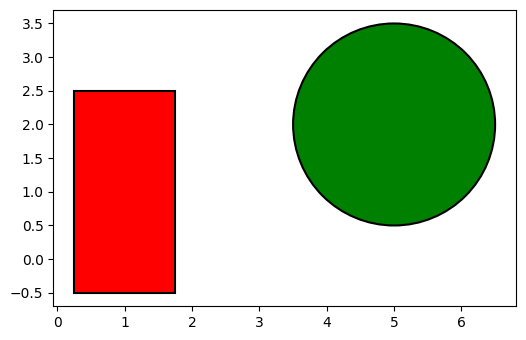

In [36]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# create figure and axes
fig, ax = plt.subplots()

# instantiate shapes
c1 = Circle(1.5, 5, 2)
r1 = Rectangle(1.5, 3, 1, 1)

# plot shapes based on type
shapes = [c1, r1]
for shape in shapes:
    if type(shape) == Circle:
        ax.add_patch(patches.Circle((shape.x, shape.y), shape.r, facecolor='green', linewidth = 1.5, edgecolor = 'black'))
    if type(shape) == Rectangle:
        # NOTE rectangle plot puts coords in bottom left, so we need to alter our center-based coords to correspond to shape's bottom left ones
        x_center = shape.x - (shape.w / 2) # removing half of shape's width and height from coords gives us bottom left coords
        y_center = shape.y - (shape.h / 2)
        ax.add_patch(patches.Rectangle((x_center, y_center), shape.w, shape.h, facecolor='red', linewidth=1.5, edgecolor='black'))

ax.set_aspect(1) # avoid squished look by setting aspect to 1
ax.autoscale() # NOTE autoscale solves rescaling of axis without using xlim, ylim

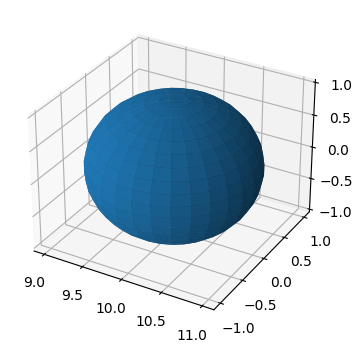

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = 10 + np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z)
plt.show()

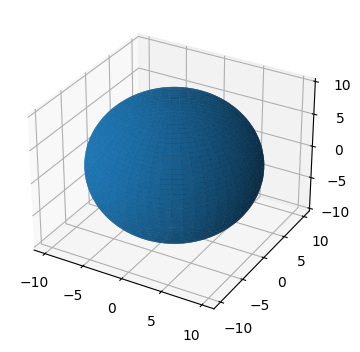

In [38]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)

# Set an equal aspect ratio
ax.set_aspect('auto')
ax.autoscale()

plt.show()

In [39]:
class Cuboid:
    def __init__(self, w, x, y, z) -> None:
        self.width = w
        self.x = x
        self.y = y
        self.z = z

ValueError: Argument Z must be 2-dimensional.

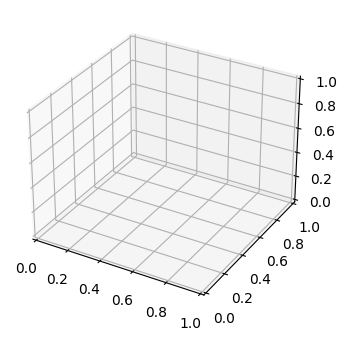

In [40]:


import matplotlib.pyplot as plt
import numpy as np
c1 = Cuboid(2, 0, 0, 0)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Make data
x = np.linspace(c1.x - c1.width / 2, c1.x + c1.width / 2, 2)
y = np.linspace(c1.x - c1.width / 2, c1.x + c1.width / 2, 2)
z = np.linspace(c1.x - c1.width / 2, c1.x + c1.width / 2, 2)

# Plot the surface
ax.plot_surface(x, y, z)

# Set an equal aspect ratio
ax.set_aspect('auto')
ax.autoscale()

plt.show()

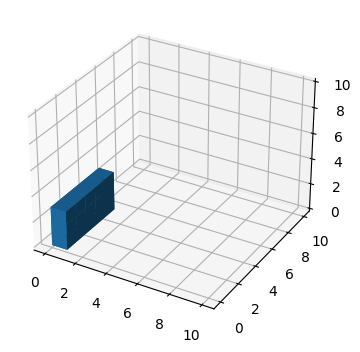

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# prepare some coordinates
x, y, z = np.indices((10, 10, 10))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < 1) & (y < 5) & (z < 3)

# combine the objects into a single boolean array
#voxels = cube1 # cuboid for couboid in cuboids

# set the colors of each object
#colors = np.empty(voxels.shape, dtype=object)
#colors[cube1] = 'green'

# and plot everything
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.voxels(cube1) # can plot a list of shapes too

plt.show();

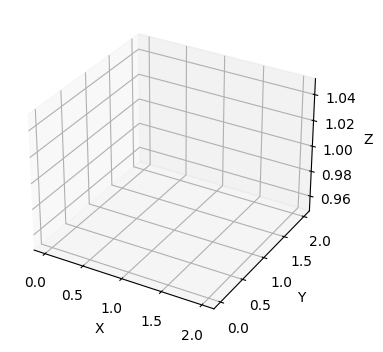

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = [-1,1]

X, Y = np.meshgrid(r, r)
a = np.zeros((2, 3, 4))
z = np.ones((1,1))
ax.plot_surface(z, z, z, alpha=0.5)
ax.plot_surface(z-1, z-1, z, alpha=0.5)
ax.plot_surface(z+1, z+1, z, alpha=0.5)
# ax.plot_surface(X,Y,-1, alpha=0.5)
# ax.plot_surface(X,-1,Y, alpha=0.5)
# ax.plot_surface(X,1,Y, alpha=0.5)
# ax.plot_surface(1,X,Y, alpha=0.5)
# ax.plot_surface(-1,X,Y, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

ValueError: x and y can be no greater than 2D, but have shapes (2,) and (2, 3, 4)

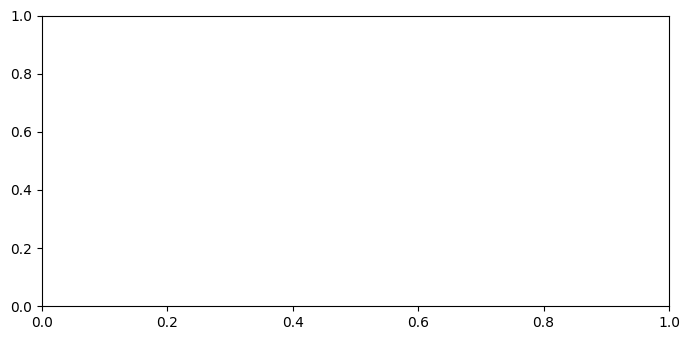

In [ ]:
a = np.ones((2, 3, 4))

plt.plot(a)

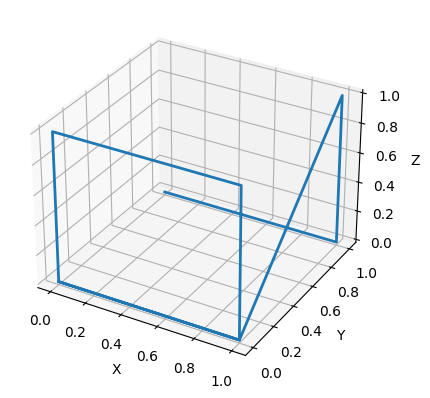

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

x = [0, 0, 1, 1, 0, 1, 1, 1, 0]
y = [0, 0, 0, 0, 0, 0, 1, 1, 1]
z = [0, 1, 1, 0, 0, 0, 1, 0, 0]


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x, y, z, linewidth=2)
#ax.set_aspect('auto')
#ax.autoscale()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

[-2  2] [-2  2] [-2  2]
[-2  2] [-2  2] [-2  2]


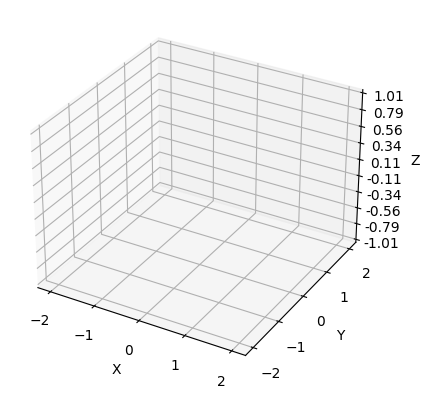

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = plt.axes(projection='3d')

# Make data.
X = np.array([[-2, 2], [-2, 2]])
Y = np.array([[-2, 2], [-2, 2]])
Z = np.array([[-2, 2], [-2, 2]])
# X, Y = np.meshgrid(X, Y)
# X, Z = np.meshgrid(X, Z)
for x_, y_, z_ in zip(X, Y, Z):
    print(x_, y_, z_)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

ValueError: 0 is not a valid value for vertical_axis; supported values are 'x', 'y', 'z'

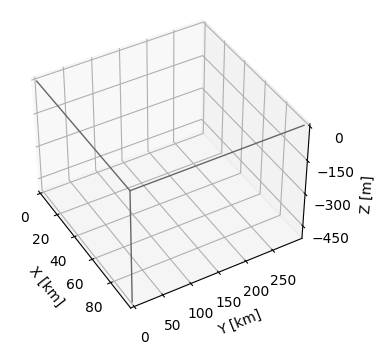

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create fake data


# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(40, -30, 0)
ax.set_box_aspect(None, zoom=0.9)


# Show Figure
plt.show()

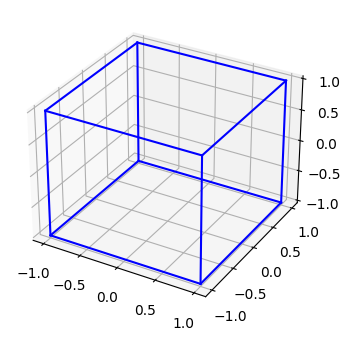

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

#draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e), color="b")

In [ ]:
import numpy as np

dice_results = [np.random.randint(1, 7) for i in range(10)]

amount_each_roll = [sum([1 for roll in dice_results if roll == i + 1]) for i in range(6)]

print(dice_results)
print(amount_each_roll)

[4, 2, 1, 5, 6, 6, 4, 2, 5, 6]
[1, 2, 0, 2, 2, 3]


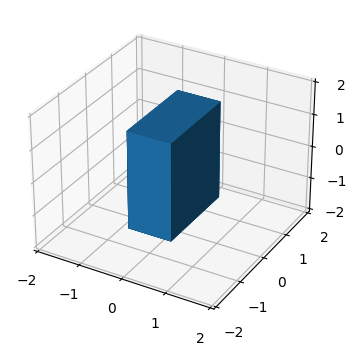

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_cube():   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)

    x = np.cos(Phi)*np.sin(Theta)
    y = np.sin(Phi)*np.sin(Theta)
    z = np.cos(Theta)/np.sqrt(2)
    return x,y,z


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = 1
b = 2
c = 3
x,y,z = get_cube()


ax.plot_surface(x*a, y*b, z*c)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
plt.show()

# use for cuboid

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from shapes import Cuboid

def plot_opaque(cuboid: Cuboid) -> None:
    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")

    dx = cuboid.width / 2
    x = np.linspace(cuboid.x - dx, cuboid.x + dx, 2)

    dy = cuboid.width / 2
    y = np.linspace(cuboid.y - dy, cuboid.y + dy, 2)

    dz = cuboid.width / 2
    z = np.linspace(cuboid.z - dz, cuboid.z + dz, 2)
    zmin = np.linspace(cuboid.z - dz, cuboid.z - dz, 2)

    xx, yy = np.meshgrid(x, y)

    ax.plot_surface(xx, yy, np.zeros((2, 2)))

c = Cuboid(1, 1, 1, 0, 0, 0)
plot_opaque(c)

# use for sphere

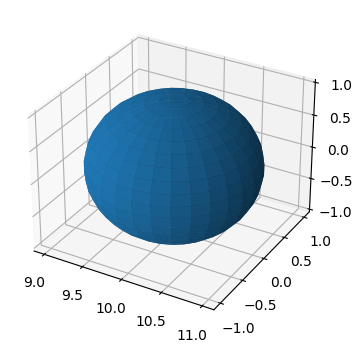

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = 10 + np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z)
plt.show()